# SISTEMAS ESTOCÁSTICOS 2023-24

## Parcial 1

Autor: Álvaro José Álvarez Arranz

## Importación de las funciones

En la siguiente celda de código se importan las funciones a usar y la iniciación de la semilla `seed` para la repetición de experimentos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, choices
from scipy.stats import pearsonr, entropy
from sympy import symbols, Eq, Matrix, solve

from gwalk import *

seed = 123 # Para repetición de experimentos

## A. Paseo estandar

En el paseo estandar se sabe que la distribución límite teórica es:
$$
\pi_i=\frac{d_i}{2m}
$$
donde `m` es el número de arcos en el grafo. A continuación se determinará experimentalmente esta distribución.

### Apartado 1

Se averiguará si el proceso aleatorio de paseo es **ergódico**, y para ello se usarán dos pruebas. En la primera prueba se efectua un solo paseo con una duración larga de 1000 veces el número de nodos en el grafo.

Se medirán las veces que se pase por cada nodo y se medirá el porcentaje de tiempo que se ha pasado en los nodos del grafo. Se almacenarán los datos en un array `timeProb` con `N` elementos donde `timeProb[k]` es el porcentaje de tiempo que hemos pasado en nodos con `k` vecinos.

In [ ]:
# Estipulamos el número de nodos y arcos
n_nodes = 100
m = 4

# En el grafo obtenido siempre vamos a empezar por el nodo 0.
n0 = 0

In [ ]:
# Creamos el grafo
G = barabasi(n_nodes, m)

In [ ]:
# Iniciamos la primera prueba.
# Creamos el array timeProb
timeProb = [0] * n_nodes

# Iniciamos los parámetros para la prueba
steps = 1000 * n_nodes
n = n0
# Para cada paso.
for _ in range(steps):
  # Obtenemos k vecinos del nodo n
  k = len(G[n])
  # Incrementamos timeProb[k] en 1
  timeProb[k] += 1

  # Obtenemos el nodo del siguiente paso
  n = step(G, n)

# Obtenemos el porcentaje de tiempo en nodos de k vecinos
timeProb = [x/steps for x in timeProb]

# Imprimimos timeProb
timeProb


[0.0,
 0.0,
 0.0,
 0.0,
 0.1297,
 0.12971,
 0.09926,
 0.08053,
 0.05955,
 0.05858,
 0.03967,
 0.01422,
 0.04727,
 0.06664,
 0.03528,
 0.03839,
 0.01938,
 0.0214,
 0.0,
 0.0,
 0.0,
 0.02738,
 0.02754,
 0.0,
 0.02966,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03736,
 0.03848,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

Ahora se creará otra prueba donde la media  es la media de conjunto. Se creará un conjunto de un número `M` de paseos equivalente a 1000 veces el número de nodos del grafo anterior.

Se ejecutarán todos los paseos en paralelo durante un número de pasos `T` equivalente a 10 veces el número de nodos. Finalmente se calculará la fracción de tiempo que se ha pasado en los nodos con `k` vecinos y se almacenarán en dos arrays: `Ensave` con la media de $\pi_i$, y `Ensvar` con su varianza.

In [ ]:
# Iniciamos los parámetros
M = n_nodes * 1000 # Número de paseos
T = n_nodes * 10 # Número de pasos

In [ ]:
# Iniciamos creando M nodos en los que se inicia el paseo
nodos_iniciales = [randint(0, n_nodes - 1) for _ in range(M)]

# Se crea un array donde guardar los datos
times = []

'''
  Se elige el modo largo, pero seguro
'''

# Por cada paseo que se va a dar
for m in range(M):
  # Iniciamos el array para el paseo M
  timeM = [0] * n_nodes

  # Indicamos el nodo en el que se inicia el paseo
  n = nodos_iniciales[m]
  # Por cada paso en el grafo
  for _ in range(T):
    # Incrementamos en 1 el contador
    timeM[len(G[n])] += 1

    # Damos un nuevo paso
    n = step(G, n)
  timeM = [x/T for x in timeM]

  times.append(timeM)


In [ ]:
# Cambiamos a np.array
times = np.array(times)

# Iniciamos Ensave y Ensvar
Ensave = []
Ensvar = []

# Obtenemos para cada k la media y la varianza
for k in range(n_nodes):
  Ensave.append(np.mean(times[:, k]))
  Ensvar.append(np.var(times[:, k]))



A partir de este momento se comparará la probabilidad en `timeProb` con `Ensave`: si ambos valores son aproximadamente la misma, el proceso es **ergódico**.

In [ ]:
# Creamos un array de valores absolutos de la resta
res = [abs(timeProb[i] - Ensave[i]) for i in range(len(timeProb))]

# Obtenemos el valor absoluto mayor
max(res)

0.001990120000000005

Como podemos observar, la diferencia entre el camino largo de 1000 veces el número de nodos y la media calculados anteriormente es de menos de aproximadamente 0.19%. Con este resultado podemos estipular que el grafo obtenido es **ergódico**.

*Adicional*: No es posible hacer una autentica comparación estadística entre las dos posibilidades obtenidas porque `timeprob` es una media sin varianza.

**¿Cómo se puede estimar la varianza?**

Una forma de estimar la varianza es a partir de la relación media-varianza. Para ello se uso de la fórmula
$$
  Var(X) = E[(X-\mu)^2]
$$
donde:
* $Var(X)$ es la varianza.
* $E[(X-\mu)^2]$ es la esperanza del cuadrado de la diferencia entre $X$ y
 su media $\mu$.


### Apartado 2

Usando los mismos datos del apartado anterior se averiguará que las medidas experimentales recogidas en `Ensave` y `Ensvar` se comportan como lo previsto en la teoría.

Para ello vamos a calcular el vector $\pi_i$ según la teoría que dice que
$$
\pi_i=\frac{d_i}{2m}
$$

In [ ]:
def vect_pi(grafo, m):
  # Obtenemos el número de nodos del grafo
  n = len(grafo)

  # Creación del vector pi_i
  v_pi = [0] * n

  for n in range(n):
    v_pi[n] = len(grafo[n]) / (2 * m)

  return v_pi

Ahora que tenemos la función, vamos a hacer la comprobación.

In [ ]:
v_pi = vect_pi(G, m)

# Ahora vamos a usar lel coeficiente de correlación para la comprobación
corr = np.corrcoef(Ensave, v_pi)[0, 1]

print(f"Similitud Ensave - pi: {corr}")

Similitud Ensave - pi: 0.5626531787870491


La similitud entre `Ensave` y $\pi_i$ tiene una correlación de 0.56, que no es muy fuerte. Para comprobar la similitud vamos a hacerlo gráficamente.

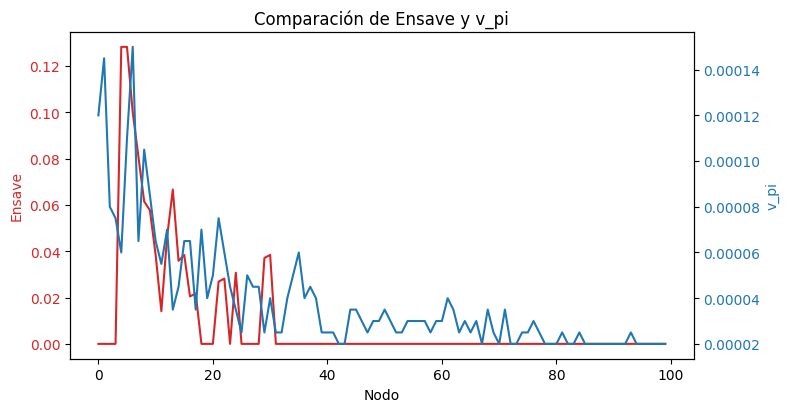

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 4))

color = 'tab:red'
ax1.set_xlabel('Nodo')
ax1.set_ylabel('Ensave', color=color)
ax1.plot(Ensave, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('v_pi', color=color)
ax2.plot(v_pi, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Comparación de Ensave y v_pi')
plt.show()

Podemos ver en la gráfica que `Ensave` y $\pi_i$ se comportan de la misma manera, por lo que podemos concluir que `Ensave` se comporta como lo indicado en la teoría.

## B. El paseo PageRank

El paseo `PageRank` tiene una distribución límite teórica dada por la siguiente ecuación:
$$
\pi=[\mathbf{I}-(1-u)\mathbf{W}]^{-1}\frac{u}{N}\mathbf{1}_N
$$

Calcular el resultado de esta ecuación para grafos de dimensiones razonables, por ejemplo 500 nodos, no es sencillo, dado que supone invertir una matriz de tamaño 500 x 500.

Sin embargo, la multiplicación de la matriz de adyacencia $A$ y $W$ o de la matriz del paseo definida como $AD^{-1}$ por un vector se hace muy fácilmente con la representación por listas de adyacencia.

Por tanto, lo más facil es calcular iterativamente
$$
\pi=(1-u)\mathbf{W}\pi + \frac{u}{N}\mathbf{1}_N
$$
renormalizando $\pi$ tras cada paso. Con esto, $\pi$ debería estabilizarse dado que esa es la distribución límite.

### Apartado 1

**¿Es $\pi$ una función del grado de un nodo?** Para que sea así, los valores de $\pi$ para nodos del mismo grado deberían ser más o menos iguales, es decir, la varianza de $\pi$ para los nodos de mismo grado debería ser pequeña.

Se repetirá la medida para varios valores de $u$ y hacer un análisis cualitativo del resultado.

Para ello haremos la función que calcula el vector $\pi$ de `PageRank`:

In [ ]:
n_nodes = 500
m = 4

In [ ]:
def calcular_vector_pi(W, u=0, tol=1e-6, max_iter = 100):
  """
    Calculamos el vector pi de manera iterativa.
  """
  # Iniciamos un vector pi
  pi = np.ones(n_nodes) / n_nodes

  for _ in range(max_iter):
    pi_nuevo = (1 - u)* np.dot(W, pi) + (u/n_nodes)*np.ones(n_nodes)
    if tol > np.linalg.norm(pi_nuevo - pi, 1):
      break
    pi = pi_nuevo

  return pi

También vamos a hacer una función que crea la matriz $W$:

In [ ]:
def get_W(G):
  """
  Calcula la matriz W del grafo G.

  Parámetros:
    - G: Grafo en forma de lista de listas.

  Retorno:
    - W: Matriz numpy
  """
  W = []
  for n in range(len(G)):
    vs = [0.0] * len(G)
    for v in G[n]:
      vs[v] = 1/len(G[n])

    W.append(vs)
  return W

In [ ]:
# Vamos a crear un grafo de 500 nodos para el ejercicio
G = barabasi(500, 4)

In [ ]:
# Creamos una matriz con los valores de pi para cada valor de u.
m_pi = []
W = get_W(G)
for u in np.arange(0.0, 1.0, 0.05):
  m_pi.append(calcular_vector_pi(W, u))

m_pi = np.array(m_pi)

In [ ]:
def comp_var(G, m_pi):
  """
  Función que se encarga de comprobar la varianza de nodos con K vecinos.

  """
  # Iniciamos el diccionario de vecinos. La clave k es el número de vecinos y el
  # valor es un array de valores pi para un nodo de k vecinos.
  vecinos = {}
  for n in range(n_nodes):
    # Obtenemos los vecinos del nodo n
    n_vecinos = len(G[n])

    # Añadimos los valores pi del nodo n
    # Primero hay que comprobar que exista la clave
    if n_vecinos in vecinos.keys():
      vecinos[n_vecinos] = vecinos[n_vecinos] + m_pi[:, n]
    else:
      vecinos[n_vecinos] = m_pi[:, n]

  varianzas = {}
  # Ahora comprobamos las varianzas.
  for k in vecinos.keys():
    varianzas[k] = np.var(vecinos[k])

  return varianzas

Ahora que tenemos las funciones necesarias, vamos a obtener la varianza más alta.

In [ ]:
var = comp_var(G, m_pi)
max(var.values())

3.0814879110195774e-33

Pdemos observar que la varianza más alta es muy baja ($3·10^{-33}$) por lo que podemos concluir que $\pi$ es una función del grado del nodo.

### Apartado 2

Tras la averiguación anterior, se repetirá el experimento con múltiples grafos con el paseo estandar.

In [ ]:
# Estableceremos para  esta parte una cantidad de 30 grafos
n_grafos = 30

Ahora vamos a obtener los vectores $\pi$ de los grafos

In [ ]:
m_pi_g = []
grafos = []
for _ in range(n_grafos):
  grafo = barabasi(n_nodes, m)
  grafos.append(grafo)

  W = get_W(grafo)

  m_pi_g.append(calcular_vector_pi(W))

m_pi_g = np.array(m_pi_g)

Ahora que tenemos una relación de vectores $\pi$ y sus grafos, se puede calcular para los nodos que tengan $k$ vecinos.

In [ ]:
def comp_vars(grafos, m_pi_g):
  """
  Función que se encarga de comprobar la varianza de nodos con K vecinos.

  """
  # Iniciamos el diccionario de vecinos. La clave k es el número de vecinos y el
  # valor es un array de valores pi para un nodo de k vecinos.
  vecinos = {}
  # Para cada grafo generado...
  for g in range(len(grafos)):

    # Para cada nodo del grafo i
    for n in range(len(grafos[g])):
      # Obtenemos los vecinos del nodo n para el grafo g
      n_vecinos = len(grafos[g][n])

      # Añadimos los valores pi del nodo n
      # Primero hay que comprobar que exista la clave
      if n_vecinos in vecinos.keys():
        vecinos[n_vecinos] = vecinos[n_vecinos] + m_pi_g[:, n]
      else:
        vecinos[n_vecinos] = m_pi_g[:, n]

  varianzas = {}
  # Ahora comprobamos las varianzas.
  for k in vecinos.keys():
    varianzas[k] = np.var(vecinos[k])

  return varianzas

Ahora, con el uso de esta función podemos obtener las varianzas de la varianza de $\pi$ para nodos con $k$ vecinos.

In [ ]:
vars = comp_vars(grafos, m_pi_g)
max(vars.values())

3.1554436208840472e-30

Podemos observar que la varianza máxima es de $3.15·10^{-30}$, por lo que podemos confirmar, al igual que pasaba en el caso anterior, que $\pi$ es una función del grado del nodo.

## C. Paseo del adolescente

Se llama "paseo del adolescente", porque a los adolescentes les gustan mucho los famosos y porque en un grupo de adolescentes hay una tendencia a agruparse alrededor de las personas "populares". En el paseo, si al instante $t$ estamos en el nodo $u$, al instante $t+1$ nos movemos a un nodo $v$, vecino de $u$ con una probabilidad que depende del número de vecinos de $u$. Formalmente:
$$
q(u\rightarrow v)=\frac{a_{uv}d_v}{\sum_ka_{vk}d_k}
$$

De este paseo inventado no se sabe nada, por lo que se hará lo siguiente:

### Verificación paseo ergódico

Se usará el mismo método de la parte A, pero haremos una modificación en el código de creación del paso:

In [ ]:
def paso_estudiante(G, k):
  vecinos = G[k]
  pesos = [len(G[v]) for v in vecinos]
  peso_total =  sum(pesos)
  prob = [w/peso_total for w in pesos]
  return choices(vecinos, prob)[0]

Primero vamos a establecer el número de famosos `n_famosos` y la cantidad de gente que puede conocer `m`.

In [ ]:
n_famosos = 200
m = 5

Vamos a crear el grafo de relaciones.

In [ ]:
G = barabasi(n_famosos, m)

Ahora que tenemos el grafo, vamos a comprobar la ergodicidad del mismo del mismo modo que se hizo en el ejercicio primero.

Empezamos por ver el porcentaje de tiempo que estamos en el perfil de cada famoso con $k$ conocidos.

In [ ]:
# Creamos el array timeFam
timeFam = [0] * n_famosos

# Indicamos la longitud del paseo y el famoso por el que se va a empezar.
steps = 1000 * n_famosos
n = 0

# Para cada paso.
for _ in range(steps):
  # Obtenemos k vecinos del nodo n
  k = len(G[n])
  # Incrementamos timeProb[k] en 1
  timeFam[k] += 1

  # Obtenemos el nodo del siguiente paso
  n = paso_estudiante(G, n)

# Obtenemos el porcentaje de tiempo en nodos de k vecinos
timeFam = [x/steps for x in timeFam]

Ahora, al igual que hicimos en el apartado 1 del ejercicio A, comprobaremos que `Famave` y `timeFam` son semejantes.

In [ ]:
# Iniciamos los parámetros
M = n_famosos * 1000 # Número de paseos
T = n_famosos * 10 # Número de pasos

In [ ]:
# Iniciamos creando M nodos en los que se inicia el paseo
nodos_iniciales = [randint(0, n_famosos - 1) for _ in range(M)]

# Se crea un array donde guardar los datos
times = []

'''
  Se elige el modo largo, pero seguro
'''

# Por cada paseo que se va a dar
for m in range(M):
  # Iniciamos el array para el paseo M
  timeM = [0] * n_famosos

  # Indicamos el nodo en el que se inicia el paseo
  n = nodos_iniciales[m]
  # Por cada paso en el grafo
  for _ in range(T):
    # Incrementamos en 1 el contador
    timeM[len(G[n])] += 1

    # Damos un nuevo paso
    n = paso_estudiante(G, n)
  timeM = [x/T for x in timeM]

  times.append(timeM)

In [ ]:
# Cambiamos a np.array
times = np.array(times)

# Iniciamos Ensave y Ensvar
Famave = []
Famvar = []

# Obtenemos para cada k la media y la varianza
for k in range(n_famosos):
  Famave.append(np.mean(times[:, k]))
  Famvar.append(np.var(times[:, k]))

In [ ]:
# Creamos un array de valores absolutos de la resta
res = [abs(timeFam[i] - Famave[i]) for i in range(len(timeFam))]

# Obtenemos el valor absoluto mayor
max(res)

0.0009170550000000138

Vemos que la diferencia es de menos de $0.1\%$ por lo que se puede estimar que el paseo es **ergódico**.

### Distribución límite

Aunque nos ha salido una diferencia mínima entre las dos pruebas anteriores, resultado en paseo **ergódico**, vamos a verificar la estabilidad de la distribución límite, lo que confirmaría la creencia de que el paseo es ergónico. De no serlo no tiene sentido esto.

Para ello, vamos a usar una función para comprobar la estabilidad de la distribución.

In [ ]:
def verificar_estabilidad(grafo, iteraciones = 200):
  # Obtenemos la matriz de transiciones
  W = np.array(get_W(grafo))

  # Obtenemos los autovalores y autovectores
  eigenval, eigenvec = np.linalg.eig(W.T)

  # Obtenemos La posición del autovalor más alto
  index = np.argmax(np.abs(eigenval))

  # Obtenemos el vector correspondiente al índice
  autovector_maximo = eigenvec[:, index]

  # Normalizamos el vector a 1
  vector = autovector_maximo / np.sum(autovector_maximo)

  # Hacemos la verificación
  for _ in range(iteraciones):
    n_vector = np.dot(vector, W)
    if np.allclose(vector, n_vector):
      print("La distribución límite es estable")
      break
  else:
    print(f"La distribución no es estable tras {iteraciones} iteraciones. Puede que se necesiten más.")

A continuación vamos a ver si se confirma que el paseo es **ergódico**.

In [ ]:
verificar_estabilidad(G)

La distribución límite es estable


Vista la confirmación de que la distribución límite es estable, podemos concluir sin ninguna duda  que el paseo es **ergódico**.

### Dependencia del grado

A continuación se verificará si hay una dependencia del grado del nodo. Esto se hace más o menos como en el apartado anterior, con la excepciónque en este caso no hay un modelo teórico.

In [ ]:
# Lo primero, y más facil, es comprobar el grado de salida de los nodos
grado_salida = [len(G[n]) for n in range(len(G))]

In [ ]:
# Ahora vamos a comprobar el número de vértices que entran en cada nodo
grado_entrada = [0] * len(G)

# Por cada nodo del grafo
for n in range(len(G)):
  # Miramos los vecinos del grafo
  neig = G[n]

  # Por cada vecino, sumamos 1 al nodo correspondiente
  for k in neig:
    grado_entrada[k] += 1

Ahora que tenemos los grados de entrada y salida por nodo, podemos hacer el estudio de dependencia.

In [ ]:
corr, _ = pearsonr(grado_entrada, grado_salida)
print(f"Correlación con pearsonr entre grado de entrada y salida: {corr}")

Correlación con pearsonr entre grado de entrada y salida: 0.9999999999999998


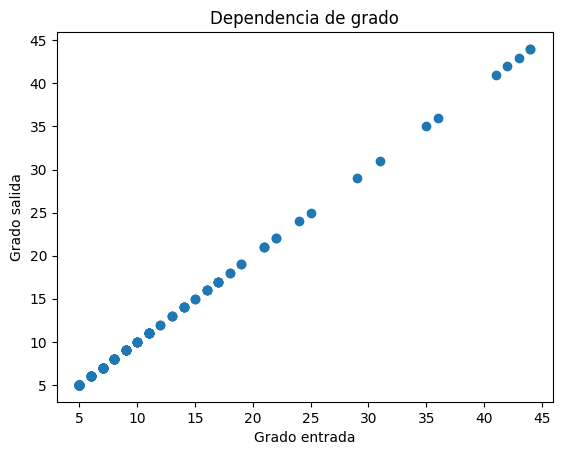

In [ ]:
plt.scatter(grado_entrada, grado_salida)
plt.xlabel('Grado entrada')
plt.ylabel('Grado salida')
plt.title('Dependencia de grado')
plt.show()

Como podemos observar en los grafos y en la correlación de los grados, podemos concluir que hay una fuerte dependencia del grado del grado dirigido obtenido.

### Diferencia entre distribuciones

A continuación, se analizará la diferencia entre esta distribución y la distribución de un paseo estandar. Tenemos una distribución que sigue la siguiente fórmula:
$$
q(u\rightarrow v)=\frac{a_{uv}d_v}{\sum_ka_{vk}d_k}
$$
Mientras que la estandar se rige por la siguiente formula:
$$
\pi_i=\frac{d_i}{2m}
$$

In [ ]:
# Calculamos la distribución para el paseo estandar
pi_estandar = np.array([len(vecinos) / (2*len(G)) for vecinos in G])

# Normalizamos para asegurar suma 1
pi_estandar = pi_estandar / sum(pi_estandar)

# calculamos la matriz q
q = np.zeros((n_famosos, n_famosos))
W = np.array(get_W(G))
for u in range(n_famosos):
  for v in range(n_famosos):
    numerador = W[u,v] * grado_entrada[v]
    denominador = sum(W[v,k] * grado_entrada[k] for k in range(n))
    if denominador != 0:
      q[u, v] = numerador/denominador

pi_estu = np.ones(n_famosos) / n_famosos

# Un umbral pequeño para la convergencia
epsilon = 1e-8
#Máximo iteraciones
max_iter = 1000

for _ in range(max_iter):
  pi_prev = pi_estu.copy()
  # Actualizamos pi
  pi_estu = np.dot(pi_estu, q)

  # Verificamos convergencia
  if np.linalg.norm(pi_estu - pi_prev, ord=1) < epsilon:
    break

In [ ]:
# Calculamos la distribución
eigenval, eigenvecs = np.linalg.eig(q.T)
dist_estu = np.real_if_close(eigenvecs[:, 0] / np.sum(eigenvecs[:,0]))

# Normalizamos para que sea suma 1
dist_estu /= np.sum(dist_estu)

Ahora que tenemos ambas distribuciones, podemos compararlas

In [ ]:
# Usaremos la divergencia de Kullback-Leibler
divergencia_kl = entropy(dist_estu, pi_estandar)
print(f"Divergencia: {divergencia_kl}")

Divergencia: 0.25541925428315115


Podemos ver que la divergencia es de 0.2554, por lo que estamos en situación de asegurar que ambas distribuciones son diferentes.